# Holiday Package Prediction 

**Problem Statement**

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


**Tasks to Solve :**
To predict which customer is more likely to purchase the newly introduced travel package
Which variables are most significant.
Which segment of customers should be targeted more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Travel_pakage.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning 
1. Handling Missing Values
2. Handling Duplicates
3. Checking data type
4. Understand the dataset

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
## Check all categories features 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [11]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [12]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [13]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [14]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [15]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [16]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [17]:
# Checking Missin Values 
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [18]:
# Identify features with missing values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]

# Print the percentage of missing values for each feature
for feature in features_with_na:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)
    print(f"{feature}: {missing_percentage}% missing values")

Age: 4.62357% missing values
TypeofContact: 0.51146% missing values
DurationOfPitch: 5.13502% missing values
NumberOfFollowups: 0.92062% missing values
PreferredPropertyStar: 0.53191% missing values
NumberOfTrips: 2.86416% missing values
NumberOfChildrenVisiting: 1.35025% missing values
MonthlyIncome: 4.76678% missing values


In [19]:
# Statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


### Imputing Null Values 
1. Imputing Median value for Age column
2. Imputing mode for TypeofContact 
3. Imputing Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is a Discrite feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOFChildrenVisiting
8. Impute Median for MonthlyIncome

In [20]:
# Age 
df.Age.fillna(df.Age.median(),inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

# DurationOfPitch 
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(0,inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [21]:
df.drop('CustomerID',inplace=True, axis=1)

df.isnull().sum()

# feature Engineering 

In [22]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [23]:
# Create a new column 'TotalVisiting'
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

# Drop the original columns
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [25]:
# Get all the Numerical feature 
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical features:',len(num_features))

Num of Numerical features: 12


In [26]:
# Get all the Categorical feature 
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical features:',len(cat_features))

Num of Categorical features: 6


In [27]:
# Discrete Feature 
discreate_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Descreate features:',len(discreate_features))

Num of Descreate features: 9


In [28]:
# Continuous Feature
con_features = [feature for feature in num_features if feature not in discreate_features]
print('Num of Continuous features:',len(con_features))

Num of Continuous features: 3


In [29]:
# Train Test Split
from sklearn.model_selection import train_test_split
# Separating the features and the target variable
X = df.drop(columns=['ProdTaken'])
y = df['ProdTaken']

In [30]:
# Create column Transformer with3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Identifying categorical and numerical features
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

# Defining transformers
numeric_transformer=StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

# Creating the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0)
X_train.shape,X_test.shape

((3666, 17), (1222, 17))

In [32]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [33]:
# applying the transformation in training (fit_transform)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [55]:
# Define models ( you can add no of option algo in between {    }    
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier()
}

# Iterate over models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Testing set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # Print model name
    print(f"Model: {name}")

    # Print evaluation metrics for training set
    print("Training Set Performance:")
    print("Accuracy:", model_train_accuracy)
    print("F1 Score:", model_train_f1)
    print("Precision:", model_train_precision)
    print("Recall:", model_train_recall)
    print("ROC AUC Score:", model_train_rocauc_score)
    print("==============================================================")

    # Print evaluation metrics for testing set
    print("\nTesting Set Performance:")
    print("Accuracy:", model_test_accuracy)
    print("F1 Score:", model_test_f1)
    print("Precision:", model_test_precision)
    print("Recall:", model_test_recall)
    print("ROC AUC Score:", model_test_rocauc_score)
    print("==============================================================\n")


Model: Decision Tree
Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC Score: 1.0

Testing Set Performance:
Accuracy: 0.9271685761047463
F1 Score: 0.9264687990476418
Precision: 0.8202764976958525
Recall: 0.7807017543859649
ROC AUC Score: 0.8707331709555579

Model: Random Forest
Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC Score: 1.0

Testing Set Performance:
Accuracy: 0.9189852700490998
F1 Score: 0.9122659856625814
Precision: 0.9271523178807947
Recall: 0.6140350877192983
ROC AUC Score: 0.8014843446644782

Model: Adaboost
Training Set Performance:
Accuracy: 0.8502454991816694
F1 Score: 0.8308197371030869
Precision: 0.696969696969697
Recall: 0.36560693641618497
ROC AUC Score: 0.6643098569101773

Testing Set Performance:
Accuracy: 0.8379705400981997
F1 Score: 0.8112557377279274
Precision: 0.65
Recall: 0.2850877192982456
ROC AUC Score: 0.624938225846306

Model: Gradient Boost
Training Set Performance:
Accura

# Hyperparameter Tunning 

In [56]:
rf_params = { "max_depth":[5, 7,15,10, None],
             "max_features":[5,7,"auto",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]}
gradient_params={"loss":["log_loss","deviance","exponential"],
                 "criterion":["friedman_mse","squared_error","mse"],
                 "min_samples_split":[2, 8, 15, 20],
                 "n_estimators":[100, 200, 500,],
                 "max_depth":[5, 8, 15, None, 10]
}                             

In [37]:
rf_params

{'max_depth': [5, 7, 15, 10, None],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [57]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10]}

In [58]:
randomcv_models = [
                ("RF",RandomForestClassifier(), rf_params),
    ("Gradient Boost",GradientBoostingClassifier(),gradient_params )
    
]

In [59]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 7, 15, 10, None],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('Gradient Boost',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]})]

In [60]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random =RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"--------------------Best Param for {model_name}---------------------------")
    print(model_param[model_name])
                                                        

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------------Best Param for RF---------------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
--------------------Best Param for Gradient Boost---------------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 15, 'loss': 'exponential', 'criterion': 'squared_error'}


In [66]:
# Define models
models = {
    
    "Random Forest": RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,
                                           max_depth= None),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=200, min_samples_split=8, max_depth=15, loss='exponential',
                                                 criterion='squared_error')
}

# Iterate over models
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Testing set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # Print model name
    print(f"Model: {name}")

    # Print evaluation metrics for training set
    print("Training Set Performance:")
    print("Accuracy:", model_train_accuracy)
    print("F1 Score:", model_train_f1)
    print("Precision:", model_train_precision)
    print("Recall:", model_train_recall)
    print("ROC AUC Score:", model_train_rocauc_score)
    print("==============================================================")

    # Print evaluation metrics for testing set
    print("\nTesting Set Performance:")
    print("Accuracy:", model_test_accuracy)
    print("F1 Score:", model_test_f1)
    print("Precision:", model_test_precision)
    print("Recall:", model_test_recall)
    print("ROC AUC Score:", model_test_rocauc_score)
    print("==============================================================\n")


Model: Random Forest
Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC Score: 1.0

Testing Set Performance:
Accuracy: 0.9304418985270049
F1 Score: 0.9255855919435144
Precision: 0.9440993788819876
Recall: 0.6666666666666666
ROC AUC Score: 0.828806170355466

Model: Gradient Boost
Training Set Performance:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
ROC AUC Score: 1.0

Testing Set Performance:
Accuracy: 0.9509001636661211
F1 Score: 0.9494362492482458
Precision: 0.9285714285714286
Recall: 0.7982456140350878
ROC AUC Score: 0.8920805534964171



# ROC AUC curve plot 

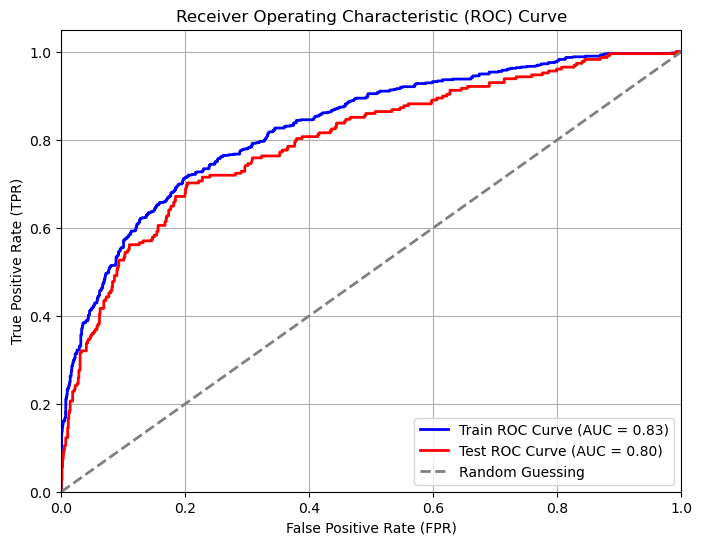

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming model is already trained and predictions are made
# model = RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None)
# model = AdaBoostClassifier(n_estimators =90,algorithm ='SAMME')
"Gradient Boost": GradientBoostingClassifier(n_estimators=200, min_samples_split=8, max_depth=15, loss='exponential', criterion='squared_error')
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Get predicted probabilities for positive class
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Compute ROC curve and ROC AUC for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()